# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [14]:
import numpy as np
import pylab as plt
import swyft
import torch

In [15]:
DEVICE = 'cuda:0'
NDIM = 10  # Dimensionality of parameter z
NROUNDS = 1  # Optimization rounds
N_TRAIN = 1000
N_BATCH = 64

In [16]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.1):
    x = z
    n = np.random.randn(*x.shape)*sigma
    return x + n

In [17]:
z0 = np.ones(NDIM)*0.6
x0 = model(z0, sigma = 1e-6)
x0.shape

(10,)

In [18]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [19]:
for i in range(NROUNDS):
    sw.round(n_sims = 3000, n_train = [N_TRAIN,N_TRAIN,N_TRAIN], lr = [1e-3,1e-4,1e-5], n_batch = N_BATCH, p = 0.0)

  0%|          | 0/1000 [00:00<?, ?it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)
Network optimization


 15%|█▍        | 146/1000 [00:04<00:28, 29.63it/s]


KeyboardInterrupt: 

In [7]:
post = []
for i in range(NROUNDS):
    post.append(sw.get_posteriors(nround=i))

estimating lnL: 100%|██████████| 47/47 [00:00<00:00, 126.85it/s]


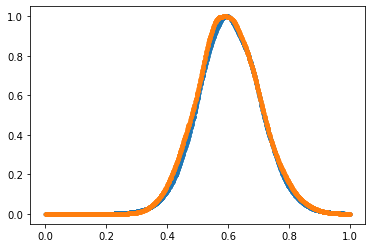

In [21]:
for i in range(NROUNDS):
    for j in range(2):
        x = post[i][j]['z'][:,0]
        y = np.exp(post[i][j]['lnL'])
        x, y = swyft.sortbyfirst(x, y)
        plt.plot(x, y, label=i, marker='.')
        #plt.plot(post[i][0]['z'], post[i][0]['lnL'], label=i)
#plt.legend()
#plt.xlim([0.45, 0.55])
#plt.ylim([-5, 0])